In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline

train = pd.read_csv('D:/data-analysis/Titanic/train.csv')
test = pd.read_csv('D:/data-analysis/Titanic/test.csv')

train_original = train.copy()
test_original = test.copy()

print(pd.isnull(train).sum())
print(pd.isnull(test).sum())
#print test.info()
train = train.drop(['Cabin','Ticket'],axis=1)
test = test.drop(['Cabin','Ticket'],axis=1)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


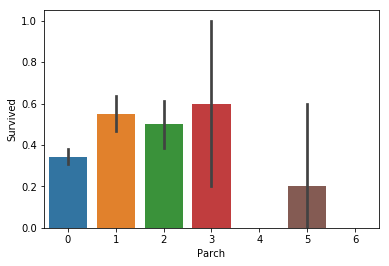

<Figure size 432x288 with 0 Axes>

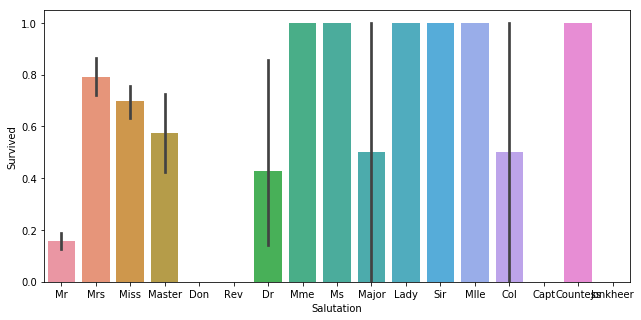

In [2]:
plt.figure(1)
sns.barplot(x='Parch',y='Survived',data=train)

train['Salutation'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Salutation'] = test['Name'].str.extract(' ([A-Za-z]+)\.')
plt.figure(2)
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5)
sns.barplot(x='Salutation',y='Survived',data=train)

In [3]:
#Embarked in train
print(train['Embarked'].value_counts())
train = train.fillna({"Embarked": "S"})
print(pd.isnull(train).sum())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
Salutation       0
dtype: int64


In [4]:
pd.crosstab(test['Salutation'],test['Sex'])

Sex,female,male
Salutation,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [5]:
#to fill value of fare in test data
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pClass = test["Pclass"][x] 
        test["Fare"][x] = round(test[test["Pclass"] == pClass]["Fare"].mean(), 4)        


c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
print(train[['Salutation', 'Survived']].groupby(['Salutation'], as_index=False).mean())

   Salutation  Survived
0        Capt  0.000000
1         Col  0.500000
2    Countess  1.000000
3         Don  0.000000
4          Dr  0.428571
5    Jonkheer  0.000000
6        Lady  1.000000
7       Major  0.500000
8      Master  0.575000
9        Miss  0.697802
10       Mlle  1.000000
11        Mme  1.000000
12         Mr  0.156673
13        Mrs  0.792000
14         Ms  1.000000
15        Rev  0.000000
16        Sir  1.000000


In [7]:
total_data = [train,test]

for data in total_data:
    data['Salutation'] = data['Salutation'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer'], 'Mr')
    data['Salutation'] = data['Salutation'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    data['Salutation'] = data['Salutation'].replace('Mlle', 'Miss')
    data['Salutation'] = data['Salutation'].replace(['Ms','Dona'], 'Miss')
    data['Salutation'] = data['Salutation'].replace('Mme', 'Mrs')

print(train[['Salutation', 'Survived']].groupby(['Salutation'], as_index=False).mean())
print(train['Salutation'].value_counts())

  Salutation  Survived
0     Master  0.575000
1       Miss  0.702703
2         Mr  0.160149
3        Mrs  0.793651
4      Royal  1.000000
Mr        537
Miss      185
Mrs       126
Master     40
Royal       3
Name: Salutation, dtype: int64


In [8]:
#fill in values for Age

for x in range(len(train["Age"])):
    if pd.isnull(train["Age"][x]):
        title = train["Salutation"][x] 
        train["Age"][x] = round(train[train["Salutation"] == title]["Age"].mean(), 4)
        
for x in range(len(test["Age"])):
    if pd.isnull(test["Age"][x]):
        test_title = test["Salutation"][x] 
        test["Age"][x] = round(test[test["Salutation"] == test_title]["Age"].mean(), 4)  
        
#for one value that's left in the test set
for x in range(len(test["Age"])):
    if pd.isnull(test["Age"][x]):
        Gender = test["Sex"][x] 
        test["Age"][x] = round(test[test["Sex"] == Gender]["Age"].mean(), 4)

        
age_labels = ['Unknown','Baby','Child','Teenager','Adult','Middle','Senior']
bins = [-1,0,5,12,18,35,60,np.inf]
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = age_labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = age_labels)      

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Adult': 4, 'Middle': 5, 'Senior': 6}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5}
train['Salutation'] = train['Salutation'].map(title_mapping)
train['Salutation'] = train['Salutation'].fillna(0)
test['Salutation'] = test['Salutation'].map(title_mapping)
test['Salutation'] = test['Salutation'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Salutation,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,1,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,3,5
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,2,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,3,4
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,1,4


In [10]:
# Mapping of gender variables
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [11]:
# Mapping of Embarked variables
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [12]:
print(train[train['Embarked'] == 3]['Fare'].head())

#Fare feature
for x in range(len(train["Embarked"])):
    if train["Embarked"][x] != 'Q':
        train["Fare"][x] = train["Fare"][x] * 1.14        

print(train[train['Embarked'] == 3]['Fare'].head())

train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)
train['FareBand'] = pd.to_numeric(train['FareBand'])


5      8.4583
16    29.1250
22     8.0292
28     7.8792
32     7.7500
Name: Fare, dtype: float64


c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


5      9.642462
16    33.202500
22     9.153288
28     8.982288
32     8.835000
Name: Fare, dtype: float64


In [13]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
predictors = train.drop(['Survived','Name','PassengerId','Embarked'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [14]:
predictors.head()

,Pclass,Sex,SibSp,Parch,Salutation,AgeGroup,FareBand
0,3,0,1,0,1,4,1
1,1,1,1,0,3,5,4
2,3,1,0,0,2,4,2
3,1,1,1,0,3,4,4
4,3,0,0,0,1,4,2


In [15]:
decisiontree = tree.DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.23


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8274111675126904

In [17]:
test = test.drop(['PassengerId','Name','Embarked'],axis=1)
test.head()

,Pclass,Sex,SibSp,Parch,Salutation,AgeGroup,FareBand
0,3,0,0,0,1,4,1
1,3,1,1,0,3,5,1
2,2,0,0,0,1,6,2
3,3,0,0,0,1,4,2
4,3,1,1,1,3,4,2


In [18]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.74


c:\users\bal\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
pred_test = decisiontree.predict(test)
submission = pd.read_csv('C:/Users/gaurav/Pictures/Titanic/gender_submission.csv')
submission['Survived'] = pred_test
submission['PassengerId']=test_original['PassengerId']
pd.DataFrame(submission, columns=['PassengerId','Survived']).to_csv('C:/Users/gaurav/Pictures/Titanic/titanic_submission2.csv')